<h2>SQL Tutorial</h2>
Data is coming from a project I have stored at Bigquery</p>

<p style="color:black;"><a href="https://cloud.google.com/bigquery/docs/reference/standard-sql/query-syntax">Google Docs with Standard SQL Syntacs</a></p>



<p>All examples below uses Standard SQL</p>


In [2]:
import pandas
# import matplotlib.pyplot as plt

process_date = "2019-11-28"
process_date_no_dash = "20191128"
project_id = 'reilistpro'

<b>SQL Queries</b>
<p>The SELECT * returns every columns in the </p>
<p>The SELECT (Column name) returns choosen columns.</p>



<h2>WHERE clause</h2>

The WHERE clause filters out rows against BOOL values and discards all rows that do not return TRUE.


The example uses a WHERE clause to show property_type for "house" value and returning id, place_name and created_on as columns


In [4]:
query = """
  SELECT a.id, a.place_name, a.created_on

    FROM `properati-data-public.properties_br.properties_rent_201501` AS a
    
    WHERE a.property_type = "house"
    
    LIMIT 10
    
""".format(process_date_no_dash)


# Run a Standard SQL query using the environment's default project
df = pandas.read_gbq(query, dialect='standard')

# Run a Standard SQL query with the project set explicitly
df = pandas.read_gbq(query, project_id=project_id, dialect='standard')

print(query)

df.head(10)


  SELECT a.id, a.place_name, a.created_on

    FROM `properati-data-public.properties_br.properties_rent_201501` AS a
    
    WHERE a.property_type = "house"
    
    LIMIT 10
    



,id,place_name,created_on
0,ba957ad3cb2d12d55d1f0466eeffe788a35a6f4f,São Paulo,2014-08-04
1,db6f890847bcacc6ec3e78a0e6613132174e4c70,São Paulo,2014-12-05
2,f7d3243419c85cf439189481819f13cb22ab0498,São Paulo,2014-10-01
3,c1e10a8afe111ba5caa5034df1ecb56b25b772f9,São Paulo,2014-08-19
4,201e0ccc9fc63a78f68391bdd74ac5407e07da9b,São Paulo,2014-08-04
5,f5942694fe76bfe705275acfe74148c588367f86,São Paulo,2014-09-01
6,50a4a96d3ec01b7b1032e5eec4a3496b38f35c4f,São Paulo,2014-10-09
7,c822a8819d8874916877cc6b3c91194cbf5968ca,São Paulo,2014-10-09
8,0dff14f277324eb9f04d59b6c26758ccdb744e27,São Paulo,2014-12-05
9,07383fafc72a9aa9f0286b841b782ca718485de8,São Paulo,2014-09-01


<h2>GROUP BY clause</h2>

Group by clause groups together rows in a table with non-distinct values
The example below get the SUM of price_usd_per_m2 and marks it in our table as "sum" and returns columns "created_on", "place_name", "state_name". It's GROUP BY the list of the 3 rows



In [6]:
query = """
  SELECT SUM(a.price_usd_per_m2) AS sum, a.created_on, a.place_name, a.state_name

    FROM `properati-data-public.properties_br.properties_rent_201501` AS a
    
    GROUP BY a.created_on, a.place_name, a.state_name

    LIMIT 10
""".format(process_date_no_dash)

# Run a Standard SQL query using the environment's default project
df = pandas.read_gbq(query, dialect='standard')

# Run a Standard SQL query with the project set explicitly
df = pandas.read_gbq(query, project_id=project_id, dialect='standard')

print(query)

df.head(10)


  SELECT SUM(a.price_usd_per_m2) AS sum, a.created_on, a.place_name, a.state_name

    FROM `properati-data-public.properties_br.properties_rent_201501` AS a
    
    GROUP BY a.created_on, a.place_name, a.state_name

    LIMIT 10



,sum,created_on,place_name,state_name
0,NaN,2014-08-07,Catu,Bahia
1,6.088095,2015-01-20,Pernambuco,Pernambuco
2,35.472542,2014-10-29,São Paulo,São Paulo
3,NaN,2014-08-04,São Paulo,São Paulo
4,475.530131,2014-07-16,São Paulo,São Paulo
5,130.519110,2014-11-19,São Paulo,São Paulo
6,NaN,2014-09-01,São Paulo,São Paulo
7,47.070123,2014-12-05,São Paulo,São Paulo
8,6.262800,2014-10-01,São Paulo,São Paulo
9,138.062237,2014-10-18,São Paulo,São Paulo


<h2>HAVING clause</h2>

<p>The<code> Having Clause</code>is simliar to the <code>Where Clause</code>it filters out rows that do not return TRUE</p>
<p><code>HAVING</code> is differs from the <code>WHERE</code> by</p>
<li><code>HAVING</code> requires <code> GROUP BY</code></li>
<li><code>HAVING</code> occurs after <code>GROUP BY</code> and before <code>ORDER BY</code></li>
<li>This differs from the <code>WHERE</code> clause, which is evaluated before <code>GROUP BY</code> and aggregation</li>

<p>Below we have Aliase pc which gives us the SUM of the Price. We SELECT place_name and price. We returned</p>

In [8]:
query = """
  SELECT place_name, SUM(price) AS pc

    FROM `properati-data-public.properties_br.properties_rent_201501`
    
    GROUP BY place_name
    
    HAVING pc > 10
    
    LIMIT 10
    
""".format(process_date_no_dash)

# Run a Standard SQL query using the environment's default project
df = pandas.read_gbq(query, dialect='standard')

# Run a Standard SQL query with the project set explicitly
df = pandas.read_gbq(query, project_id=project_id, dialect='standard')

print(query)

df.head(10)


  SELECT place_name, SUM(price) AS pc

    FROM `properati-data-public.properties_br.properties_rent_201501`
    
    GROUP BY place_name
    
    HAVING pc > 10
    
    LIMIT 10
    



,place_name,pc
0,Pernambuco,1200.0
1,São Paulo,2810618.0
2,Lapa,412900.0
3,Belém,127750.0
4,Trairi,5500.0
5,Macapá,7500.0
6,Itacaré,1500.0
7,Salvador,73700.0
8,Caucaia,299.0
9,Palmas,75920.0


<h2>Inner Joins</h2>
<code>[INNER] JOIN</code> or simply <code>JOIN</code>

We asked to keep the price and property_type columns from the first table and the place_name from the second table to be presented in our final table

![title](INNERJoin.png)



In [ ]:
query = """
  SELECT a.price, a.property_type, b.place_name

    FROM `properati-data-public.properties_br.properties_rent_201501` AS a

    INNER JOIN `properati-data-public.properties_br.properties_rent_201502` AS b 
    ON a.id = b.id
    
    INNER JOIN `properati-data-public.properties_br.properties_rent_201503` AS c 
    ON a.id = c.id
   
    LIMIT 10
""".format(process_date_no_dash)

# Run a Standard SQL query using the environment's default project
df = pandas.read_gbq(query, dialect='standard')

# Run a Standard SQL query with the project set explicitly
df = pandas.read_gbq(query, project_id=project_id, dialect='standard')

print(query)

df.head(10)

<h2>Cross Joins</h2>

Combines each row from the first table with each row from the second table M*N

In [11]:
query = """
  SELECT a.property_type, a.place_name, b.price, b.state_name

    FROM `properati-data-public.properties_br.properties_rent_201501` AS a
    
    CROSS JOIN `properati-data-public.properties_br.properties_rent_201502` AS b
    
    LIMIT 10
""".format(process_date_no_dash)

# Run a Standard SQL query using the environment's default project
df = pandas.read_gbq(query, dialect='standard')

# Run a Standard SQL query with the project set explicitly
df = pandas.read_gbq(query, project_id=project_id, dialect='standard')

print(query)

df.head(10)


  SELECT a.property_type, a.place_name, b.price, b.state_name

    FROM `properati-data-public.properties_br.properties_rent_201501` AS a
    
    CROSS JOIN `properati-data-public.properties_br.properties_rent_201502` AS b
    
    LIMIT 10



,property_type,place_name,price,state_name
0,store,São Paulo,1300.0,São Paulo
1,store,São Paulo,14000.0,São Paulo
2,store,São Paulo,5000.0,São Paulo
3,store,São Paulo,950.0,São Paulo
4,store,São Paulo,3800.0,São Paulo
5,store,São Paulo,10000.0,São Paulo
6,store,São Paulo,0.0,São Paulo
7,store,São Paulo,0.0,Bahia
8,store,São Paulo,28000.0,São Paulo
9,store,São Paulo,1200.0,Pernambuco


<h2>Full cross Joins</h2>
Returns all the rows that meet the join conditions. <code>FULL</code> means "all rows".
<code>OUTER</code> means if one row doesn't match a FROM given then the other rows in the other FROM , the rows will return null.

Below we <code>FULL JOIN ON</code> created_on from each table and return a.property_type, a.place_name, b.price, b.state_name, b.created_on.

In [12]:
query = """
  SELECT a.property_type, a.place_name, b.price, b.state_name, b.created_on

    FROM `properati-data-public.properties_br.properties_rent_201501` AS a
    
    FULL JOIN `properati-data-public.properties_br.properties_rent_201502` AS b
    
    ON a.created_on = b.created_on

    LIMIT 10
""".format(process_date_no_dash)

# Run a Standard SQL query using the environment's default project
df = pandas.read_gbq(query, dialect='standard')

# Run a Standard SQL query with the project set explicitly
df = pandas.read_gbq(query, project_id=project_id, dialect='standard')

print(query)

df.head(10)


  SELECT a.property_type, a.place_name, b.price, b.state_name, b.created_on

    FROM `properati-data-public.properties_br.properties_rent_201501` AS a
    
    FULL JOIN `properati-data-public.properties_br.properties_rent_201502` AS b
    
    ON a.created_on = b.created_on

    LIMIT 10



,property_type,place_name,price,state_name,created_on
0,house,São Paulo,3800.0,São Paulo,2014-10-01
1,house,São Paulo,1400.0,São Paulo,2014-10-01
2,house,São Paulo,80000.0,São Paulo,2014-10-01
3,house,São Paulo,6500.0,São Paulo,2014-10-01
4,house,São Paulo,3100.0,São Paulo,2014-10-01
5,house,São Paulo,700.0,São Paulo,2014-10-01
6,house,São Paulo,1000.0,São Paulo,2014-10-01
7,house,São Paulo,1200.0,São Paulo,2014-10-01
8,house,São Paulo,1200.0,São Paulo,2014-10-01
9,house,São Paulo,1100.0,São Paulo,2014-10-01


<h2>Left Joins</h2>
<code>LEFT OUTER JOIN</code> always retain all rows from the selected columns from the left. They will be retained even if there aren't any rows. If there aren't any rows joined from the left or the right, all rows will return with NULLs. Rows from the right column that aren't able to join will be discarded.

In the query below, left joins on the table with all of selected columns and return everything that has the same id.

In [38]:
query = """

    SELECT a.property_type, a.place_name, a.id, a.operation, a.place_with_parent_names, 
    a.country_name, a.state_name, a.geonames_id, a.lat_lon, a.lat, a.lon, a.price, a.currency, a.price_aprox_local_currency, a.price_aprox_usd, 
    a.surface_total_in_m2, a.surface_covered_in_m2, a.price_usd_per_m2, a.price_per_m2, a.floor, a.rooms, b.created_on

    FROM `properati-data-public.properties_br.properties_rent_201501` AS a
    
    LEFT JOIN `properati-data-public.properties_br.properties_rent_201502` AS b
    
    ON a.id = b.id
    
    LIMIT 10
""".format(process_date_no_dash)

# Run a Standard SQL query using the environment's default project
df = pandas.read_gbq(query, dialect='standard')

# Run a Standard SQL query with the project set explicitly
df = pandas.read_gbq(query, project_id=project_id, dialect='standard')

print(query)

df.head(10)



    SELECT a.property_type, a.place_name, a.id, a.operation, a.place_with_parent_names, 
    a.country_name, a.state_name, a.geonames_id, a.lat_lon, a.lat, a.lon, a.price, a.currency, a.price_aprox_local_currency, a.price_aprox_usd, 
    a.surface_total_in_m2, a.surface_covered_in_m2, a.price_usd_per_m2, a.price_per_m2, a.floor, a.rooms, b.created_on

    FROM `properati-data-public.properties_br.properties_rent_201501` AS a
    
    LEFT JOIN `properati-data-public.properties_br.properties_rent_201502` AS b
    
    ON a.id = b.id
    
    LIMIT 10



,property_type,place_name,id,operation,place_with_parent_names,country_name,state_name,geonames_id,lat_lon,lat,...,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,created_on
0,store,Catu,f73c373e0588bf568164a057dd94203ac87d47b1,rent,|Brasil|Bahia|Catu|,Brasil,Bahia,None,,NaN,...,,0.00,0.00,None,NaN,NaN,NaN,NaN,NaN,2014-08-07
1,apartment,Pernambuco,d6d377927ab49671acdd38aa6f661a460601a88b,rent,|Brasil|Pernambuco|,Brasil,Pernambuco,None,"-8.126271,-34.903793",-8.126271,...,BRL,1184.32,383.55,None,63.0,6.088095,19.047619,1.0,2.0,2015-01-20
2,store,São Paulo,c6826a9508436920fd59b46a202354f3e4823d22,rent,|Brasil|São Paulo|,Brasil,São Paulo,None,"-23.1546253,-45.7906242",-23.154625,...,BRL,0.00,0.00,None,3800.0,NaN,NaN,NaN,NaN,2014-10-29
3,house,São Paulo,ba957ad3cb2d12d55d1f0466eeffe788a35a6f4f,rent,|Brasil|São Paulo|,Brasil,São Paulo,None,"-20.7780086,-49.3450562",-20.778009,...,BRL,751.10,243.25,None,NaN,NaN,NaN,NaN,1.0,2014-08-04
4,apartment,São Paulo,0999b33908c71af3b8be282ab35ab61b38a46353,rent,|Brasil|São Paulo|,Brasil,São Paulo,None,,NaN,...,BRL,4078.98,1321.00,None,319.0,4.141066,13.479624,NaN,4.0,NaT
5,apartment,São Paulo,011d5618639ce229b012022a32b22eff9abd213e,rent,|Brasil|São Paulo|,Brasil,São Paulo,None,"-23.9648026,-46.3855723",-23.964803,...,BRL,1323.12,428.50,None,60.0,7.141667,21.666667,4.0,1.0,2014-11-19
6,store,São Paulo,6f274a2d23ffa89cb0301f3277585beda7723ce8,rent,|Brasil|São Paulo|,Brasil,São Paulo,None,"-20.8343086,-49.3805559",-20.834309,...,BRL,3953.34,1280.31,None,NaN,NaN,NaN,NaN,NaN,2014-09-01
7,house,São Paulo,db6f890847bcacc6ec3e78a0e6613132174e4c70,rent,|Brasil|São Paulo|,Brasil,São Paulo,None,"-20.8178411,-49.387605",-20.817841,...,BRL,7906.68,2560.62,None,NaN,NaN,NaN,NaN,1.0,2014-12-05
8,house,São Paulo,f7d3243419c85cf439189481819f13cb22ab0498,rent,|Brasil|São Paulo|,Brasil,São Paulo,None,"-20.8126181,-49.3404534",-20.812618,...,BRL,3004.52,973.03,None,NaN,NaN,NaN,NaN,NaN,2014-10-01
9,store,São Paulo,cbfc4c495b3578c995363825a85a821217fab4ec,rent,|Brasil|São Paulo|,Brasil,São Paulo,None,,NaN,...,BRL,11069.36,3584.87,None,NaN,NaN,NaN,NaN,NaN,2014-10-18


<h2>Right Joins</h2>
<code>RIGHT JOIN</code> always retain all rows from the selected columns from the right. They will be retained even if there aren't any rows. If there aren't any rows joined from the right or the left, all rows will return with NULLs. Rows from the left column that aren't able to join will be discarded.

This is the opposite from <code>LEFT JOIN</code>

The query below does the opposite of the Left query above

In [17]:
query = """
    SELECT a.property_type, a.place_name, a.id, a.operation, a.place_with_parent_names, 
    a.country_name, a.state_name, a.geonames_id, a.lat_lon, a.lat, a.lon, a.price, a.currency, a.price_aprox_local_currency, a.price_aprox_usd, 
    a.surface_total_in_m2, a.surface_covered_in_m2, a.price_usd_per_m2, a.price_per_m2, a.floor, a.rooms, b.created_on

    FROM `properati-data-public.properties_br.properties_rent_201501` AS a
    
    RIGHT JOIN `properati-data-public.properties_br.properties_rent_201502` AS b
    
    ON a.created_on = b.created_on
    
    LIMIT 10

""".format(process_date_no_dash)

# Run a Standard SQL query using the environment's default project
df = pandas.read_gbq(query, dialect='standard')

# Run a Standard SQL query with the project set explicitly
df = pandas.read_gbq(query, project_id=project_id, dialect='standard')

print(query)

df.head(10)


    SELECT a.property_type, a.place_name, a.id, a.operation, a.place_with_parent_names, 
    a.country_name, a.state_name, a.geonames_id, a.lat_lon, a.lat, a.lon, a.price, a.currency, a.price_aprox_local_currency, a.price_aprox_usd, 
    a.surface_total_in_m2, a.surface_covered_in_m2, a.price_usd_per_m2, a.price_per_m2, a.floor, a.rooms, b.created_on

    FROM `properati-data-public.properties_br.properties_rent_201501` AS a
    
    RIGHT JOIN `properati-data-public.properties_br.properties_rent_201502` AS b
    
    ON a.created_on = b.created_on
    
    LIMIT 10




,property_type,place_name,id,operation,place_with_parent_names,country_name,state_name,geonames_id,lat_lon,lat,...,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,created_on
0,store,Catu,f73c373e0588bf568164a057dd94203ac87d47b1,rent,|Brasil|Bahia|Catu|,Brasil,Bahia,None,,NaN,...,,0.00,0.00,NaN,NaN,NaN,NaN,None,NaN,2014-08-07
1,house,Trairi,721035d784741fccd957146f64a8c708ecc6a71d,rent,|Brasil|Ceará|Trairi|,Brasil,Ceará,None,"-3.2696983,-39.2684763",-3.269698,...,BRL,464.43,150.41,522.0,200.0,0.752050,3.000000,None,NaN,2014-08-07
2,apartment,Osasco,e14ff059c7e9eca8eabc6ad45630986ff5dc9604,rent,|Brasil|São Paulo|Osasco|,Brasil,São Paulo,None,,NaN,...,BRL,1595.43,516.69,83.0,71.0,7.277324,23.239437,None,2.0,2014-08-07
3,house,Guarujá,016c34ec5cf964ef34099f0bfce1ccf3109fa171,rent,|Brasil|São Paulo|Guarujá|,Brasil,São Paulo,None,,NaN,...,BRL,1300.24,421.09,NaN,NaN,NaN,NaN,None,2.0,2014-08-07
4,house,Sorocaba,72078b53469ddcab9427680295f580ea7b846849,rent,|Brasil|São Paulo|Sorocaba|,Brasil,São Paulo,None,,NaN,...,BRL,3848.57,1246.38,NaN,NaN,NaN,NaN,None,3.0,2014-08-07
5,house,Lapa,75f85faf14f8327c9d2accf279ae69252a466897,rent,|Brasil|São Paulo|São Paulo|Lapa|,Brasil,São Paulo,None,,NaN,...,BRL,8905.95,2884.24,NaN,NaN,NaN,NaN,None,7.0,2014-08-07
6,apartment,Lapa,1e455642c4dc518497978d39df9eb658bc1cff58,rent,|Brasil|São Paulo|São Paulo|Lapa|,Brasil,São Paulo,None,,NaN,...,BRL,3265.50,1057.55,NaN,NaN,NaN,NaN,None,1.0,2014-08-07
7,house,Lapa,662f26139ceaa4f0ed4fd1a09594c5aa7635a09f,rent,|Brasil|São Paulo|São Paulo|Lapa|,Brasil,São Paulo,None,,NaN,...,BRL,3067.60,993.46,NaN,NaN,NaN,NaN,None,5.0,2014-08-07
8,apartment,Lapa,a02816b487cbe9e714bf1c72f731dc34f3222b65,rent,|Brasil|São Paulo|São Paulo|Lapa|,Brasil,São Paulo,None,,NaN,...,BRL,2671.78,865.27,NaN,NaN,NaN,NaN,None,1.0,2014-08-07
9,house,Lapa,3486c2e231b06cda12e5ccd38a0c16a60db23bf9,rent,|Brasil|São Paulo|São Paulo|Lapa|,Brasil,São Paulo,None,,NaN,...,BRL,4947.73,1602.35,NaN,NaN,NaN,NaN,None,5.0,2014-08-07


<h2>USING clause</h2>

<code>USING</code> and <code>ON</code> are simliar ON returns multiple columns, and USING returns one.

The query below selects "place_name" from (the first dataset) and does a INNER JOIN with b (the second dataset) and returns using the "id" from each dataset that join on each other.

In [37]:
query = """
  SELECT a.place_name

    FROM `properati-data-public.properties_br.properties_rent_201501` AS a
    
    INNER JOIN `properati-data-public.properties_br.properties_rent_201502` AS b
    
    USING (id)

    LIMIT 10
""".format(process_date_no_dash)

# Run a Standard SQL query using the environment's default project
df = pandas.read_gbq(query, dialect='standard')

# Run a Standard SQL query with the project set explicitly
df = pandas.read_gbq(query, project_id=project_id, dialect='standard')

print(query)

df.head(10)


  SELECT a.place_name

    FROM `properati-data-public.properties_br.properties_rent_201501` AS a
    
    INNER JOIN `properati-data-public.properties_br.properties_rent_201502` AS b
    
    USING (id)

    LIMIT 10



,place_name
0,Catu
1,Pernambuco
2,São Paulo
3,São Paulo
4,São Paulo
5,São Paulo
6,São Paulo
7,São Paulo
8,São Paulo
9,São Paulo


<h2>With Clause</h2>
The cell below has a <code>WITH Clause</code> that uses matplotlib to display a graph that
provides us with a temporary table name. <code>WITH Clause</code> is used for better readability. 

The query below, creates a estates and a state placeholder to access the SELECTed statments inside. The code create maintainability for others or when making large and complex queries.

/usr/local/lib/python3.7/site-packages/pandas_gbq/gbq.py:562: UserWarning: A progress bar was requested, but there was an error loading the tqdm library. Please install tqdm to use the progress bar functionality.
  progress_bar_type=progress_bar_type,




WITH state AS (
    SELECT price, created_on
    FROM `properati-data-public.properties_br.properties_rent_201502`
)
SELECT *
FROM state
LIMIT 10



/usr/local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


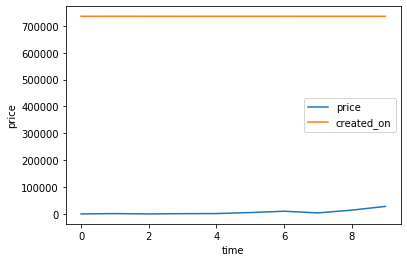

,price,created_on
0,0.0,2014-08-07
1,1200.0,2015-01-20
2,0.0,2014-10-29
3,950.0,2014-08-04
4,1300.0,2014-11-19
5,5000.0,2014-09-01
6,10000.0,2014-12-05
7,3800.0,2014-10-01
8,14000.0,2014-10-18
9,28000.0,2014-08-02


In [4]:
query = """

WITH state AS (
    SELECT price, created_on
    FROM `properati-data-public.properties_br.properties_rent_201502`
)
SELECT *
FROM state
LIMIT 10
""".format(process_date_no_dash)

# Run a Standard SQL query using the environment's default project
df = pandas.read_gbq(query, dialect='standard')

# Run a Standard SQL query with the project set explicitly
df = pandas.read_gbq(query, project_id=project_id, dialect='standard')

print(query)

plt.plot(df)
plt.legend(df)
plt.ylabel('price')
plt.xlabel('time')

plt.show()

df.head(10)

<h2>Order By Clause</h2>

Order by clause uses ascending and descending. If Order by is not write then order of the results of a query is not defined.

The query below sorts the prices in descending order with the property_type, place_name and state_name.


In [5]:
query = """
  SELECT a.price, a.property_type, a.place_name, a.state_name

    FROM `properati-data-public.properties_br.properties_rent_201501` AS a
    
    ORDER BY price DESC

    LIMIT 10
""".format(process_date_no_dash)

# Run a Standard SQL query using the environment's default project
df = pandas.read_gbq(query, dialect='standard')

# Run a Standard SQL query with the project set explicitly
df = pandas.read_gbq(query, project_id=project_id, dialect='standard')

print(query)

df.head(10)


  SELECT a.price, a.property_type, a.place_name, a.state_name

    FROM `properati-data-public.properties_br.properties_rent_201501` AS a
    
    ORDER BY price DESC

    LIMIT 10



,price,property_type,place_name,state_name
0,350000.0,apartment,Bombinhas,Santa Catarina
1,312508.0,store,Distrito Industrial,São Paulo
2,300000.0,store,Vila Brandina,São Paulo
3,300000.0,store,Parque Santo Agostinho,São Paulo
4,300000.0,store,Macuco,São Paulo
5,280000.0,apartment,Bombinhas,Santa Catarina
6,270000.0,apartment,Bombinhas,Santa Catarina
7,260000.0,store,Guarulhos,São Paulo
8,250000.0,apartment,Recife,Pernambuco
9,244982.0,store,Campinas,São Paulo


<h2>Group By Clause</h2>
GroupBy clause specifies a column or expression as the sort criterion for the result set. If no Group clause is set then the order is not defined.

Group By can be used with Aggregated functions 

In [8]:
query = """
  SELECT SUM(a.price) AS sum_price, a.created_on, a.property_type, a.place_name

    FROM `properati-data-public.properties_br.properties_rent_201501` AS a
    
    GROUP BY a.created_on, a.property_type, a.place_name

    LIMIT 10
    
""".format(process_date_no_dash)

# Run a Standard SQL query using the environment's default project
df = pandas.read_gbq(query, dialect='standard')

# Run a Standard SQL query with the project set explicitly
df = pandas.read_gbq(query, project_id=project_id, dialect='standard')

print(query)

df.head(10)


  SELECT SUM(a.price) AS sum_price, a.created_on, a.property_type, a.place_name

    FROM `properati-data-public.properties_br.properties_rent_201501` AS a
    
    GROUP BY a.created_on, a.property_type, a.place_name

    LIMIT 10
    



,sum_price,created_on,property_type,place_name
0,0.0,2014-08-07,store,Catu
1,1200.0,2015-01-20,apartment,Pernambuco
2,0.0,2014-10-29,store,São Paulo
3,12450.0,2014-08-04,house,São Paulo
4,58050.0,2014-07-16,apartment,São Paulo
5,31300.0,2014-11-19,apartment,São Paulo
6,11000.0,2014-09-01,store,São Paulo
7,13700.0,2014-12-05,house,São Paulo
8,3800.0,2014-10-01,house,São Paulo
9,32500.0,2014-10-18,store,São Paulo


<h2>Window Clause</h2>

Using WINDOW CLAUSE is great for representing a group to use analytic function in a OVER Clause(). 

Analytic functions can computes values over a group of rows and return a single result for each row. 

In the query below, we display a.id, a.price, a.created_on, a.property_type, a.place_name. We add all the prices by the place_name and get the total price for that place and put it in the "cal" column.

In [16]:
query = """
  SELECT a.id, a.price, a.created_on, a.property_type, a.place_name, LAST_VALUE(a.price)
  OVER (my_window) AS cal
  
    FROM `properati-data-public.properties_br.properties_rent_201501` AS a

  WINDOW my_window AS (
    ORDER BY a.place_name  
  )

    LIMIT 10
""".format(process_date_no_dash)

# Run a Standard SQL query using the environment's default project
df = pandas.read_gbq(query, dialect='standard')

# Run a Standard SQL query with the project set explicitly
df = pandas.read_gbq(query, project_id=project_id, dialect='standard')

print(query)

df.head(10)


  SELECT a.id, a.price, a.created_on, a.property_type, a.place_name, LAST_VALUE(a.price)
  OVER (my_window) AS cal
  
    FROM `properati-data-public.properties_br.properties_rent_201501` AS a

  WINDOW my_window AS (
    ORDER BY a.place_name  
  )

    LIMIT 10



,id,price,created_on,property_type,place_name,cal
0,7da61eb1baa977b2ce94e807430d04a46b494b31,2100.0,2014-10-29,apartment,Abraão,2100.0
1,f45363004cbaeacc2f435f5fa73dcc4126e889e8,0.0,2014-08-05,apartment,Aclimação,1500.0
2,dc6139e1a3e804d3a15c455b5d68b4a6aa77a978,1500.0,2014-08-15,apartment,Aclimação,1500.0
3,9f1c80c166a04b6d7c18a9262a8746407e7d4dff,0.0,2015-01-20,store,Aldeota,33600.0
4,7057551c5995f1a4f4e680093e10262380409568,1709.0,2014-12-01,apartment,Aldeota,33600.0
5,4bdc08a23e54f45bba29bd314cb86ff7b39deb2b,1709.0,2014-12-01,apartment,Aldeota,33600.0
6,49c43c69aabc1648efd356d59bb3c39e20c8591a,12000.0,2014-12-12,store,Aldeota,33600.0
7,2985639f9cd369be26f31cc85c8d04608667d260,12000.0,2015-01-09,store,Aldeota,33600.0
8,e85e52ade45ba82f9e340025412128b028915105,12000.0,2014-08-20,store,Aldeota,33600.0
9,0d33c6384e0aa6e710d5d83a5266800d405ca8f8,3000.0,2015-01-27,apartment,Aldeota,33600.0


<h2>Union Clause</h2>
<code>UNION ALL</code> UNION operator combines the result sets of two or more input queries by pairing columns from the result set of each query and vertically concatenating them.

<code>INTERSECT</code> operator returns rows that are found in the result sets of both the left and right input queries. Unlike <code>EXCEPT</code>, the positioning of the input queries (to the left versus right of the <code>INTERSECT</code> operator) does not matter.

<code>EXCEPT</code> operator returns rows from the left input query that are not present in the right input query.

In [16]:
query = """
WITH state AS (
    SELECT SUM(a.price), a.created_on, a.place_name
    FROM `properati-data-public.properties_br.properties_rent_201502` AS a
    GROUP BY a.price, a.created_on, a.place_name
),

estate AS (
    SELECT SUM(b.price), b.created_on, b.place_name
    FROM `properati-data-public.properties_br.properties_rent_201501` AS b
    GROUP BY b.price, b.created_on, b.place_name
   
),

place AS (
    SELECT SUM(c.price), c.created_on, c.place_name
    FROM `properati-data-public.properties_br.properties_rent_201503` AS c
    GROUP BY c.price, c.created_on, c.place_name
)

SELECT * FROM state
UNION ALL
SELECT * FROM estate
UNION ALL
SELECT * FROM place
LIMIT 10

""".format(process_date_no_dash)

# Run a Standard SQL query using the environment's default project
df = pandas.read_gbq(query, dialect='standard')

# Run a Standard SQL query with the project set explicitly
df = pandas.read_gbq(query, project_id=project_id, dialect='standard')

print(query)

df.head(10)


WITH state AS (
    SELECT SUM(a.price), a.created_on, a.place_name
    FROM `properati-data-public.properties_br.properties_rent_201502` AS a
    GROUP BY a.price, a.created_on, a.place_name
),

estate AS (
    SELECT SUM(b.price), b.created_on, b.place_name
    FROM `properati-data-public.properties_br.properties_rent_201501` AS b
    GROUP BY b.price, b.created_on, b.place_name
   
),

place AS (
    SELECT SUM(c.price), c.created_on, c.place_name
    FROM `properati-data-public.properties_br.properties_rent_201503` AS c
    GROUP BY c.price, c.created_on, c.place_name
)

SELECT * FROM state
UNION ALL
SELECT * FROM estate
UNION ALL
SELECT * FROM place
LIMIT 10




,f0_,created_on,place_name
0,0.0,2014-08-07,Catu
1,1200.0,2015-01-20,Pernambuco
2,0.0,2014-10-29,São Paulo
3,950.0,2014-08-04,São Paulo
4,4300.0,2014-07-16,São Paulo
5,1300.0,2014-11-19,São Paulo
6,5000.0,2014-09-01,São Paulo
7,10000.0,2014-12-05,São Paulo
8,3800.0,2014-10-01,São Paulo
9,14000.0,2014-10-18,São Paulo


<h2>Aggregate Functions</h2>
<p>An aggregate function is a function that summarizes the rows of a group into a single value. COUNT, MIN and MAX are examples of aggregate functions.</p>

<p style="color:black;"><a href="https://cloud.google.com/bigquery/docs/reference/standard-sql/aggregate_functions">Bigquery Aggregate Functions</a></p>
aggregate function is a function that summarizes the rows of a group into a single value. <code>COUNT, COUNTIF, MIN, MAX, SUM, AVG, ARRAY_CONCAT_AGG, ARRAY_AGG, STRING_AGG</code>

In [ ]:
query = """
  SELECT *

    FROM `properati-data-public.properties_br.properties_rent_201501`

    LIMIT 10
""".format(process_date_no_dash)

# Run a Standard SQL query using the environment's default project
df = pandas.read_gbq(query, dialect='standard')

# Run a Standard SQL query with the project set explicitly
df = pandas.read_gbq(query, project_id=project_id, dialect='standard')

print(query)

df.head(10)

<h2>Scripting and Stored procedures</h2>
<p style="color:black;"><a href="https://cloud.google.com/blog/products/data-analytics/command-and-control-now-easier-in-bigquery-with-scripting-and-stored-procedures">Scripting and Stored procedures</a></p>

The User Define Function (UDF) below can be easily applied in python syntaxs. But it could be useful for other people on a team to have queries specific and that can be run repeatly.


In [ ]:
query = """
CREATE FUNCTION mydataset.multiplyInputsWithZ(x FLOAT64, y FLOAT64, z FLOAT64)
RETURNS FLOAT64
AS (x * y * z)

""".format(process_date_no_dash)

# Run a Standard SQL query using the environment's default project
df = pandas.read_gbq(query, dialect='standard')

# Run a Standard SQL query with the project set explicitly
df = pandas.read_gbq(query, project_id=project_id, dialect='standard')

print(query)

df.head(10)

<h2>Temp Table</h2>
Temp Tables lets you store temporary table to be used later in your queries.

Code below has a control flow statement with a temp table.

In [ ]:
query = """

DECLARE year_price INT64 DEFAULT 0.00

    
  IF (SELECT COUNT(*) FROM RentAndStates) = 0 THEN
      SELECT FORMAT("The state %d doesn't have price data", target_year);
      RETURN;
  END 
  
    CREATE TEMP TABLE RentAndStates AS
    SELECT price, MAX(state) AS state
    FROM `properati-data-public.properties_br.properties_rent_201501`
    WHERE price = year_price
    GROUP BY price;
  
  SELECT * FROM RentAndStates

""".format(process_date_no_dash)

# Run a Standard SQL query using the environment's default project
df = pandas.read_gbq(query, dialect='standard')

# Run a Standard SQL query with the project set explicitly
df = pandas.read_gbq(query, project_id=project_id, dialect='standard')

print(query)

df.head(10)

<h2>CREATING graphs</h2>

<p style="color:black;"><a href="https://cloud.google.com/bigquery/docs/visualize-jupyter">Visusalization</a></p>





WITH state AS (
    SELECT price, created_on, rooms
    FROM `properati-data-public.properties_br.properties_rent_201502`
   
)
SELECT *
FROM state

LIMIT 10



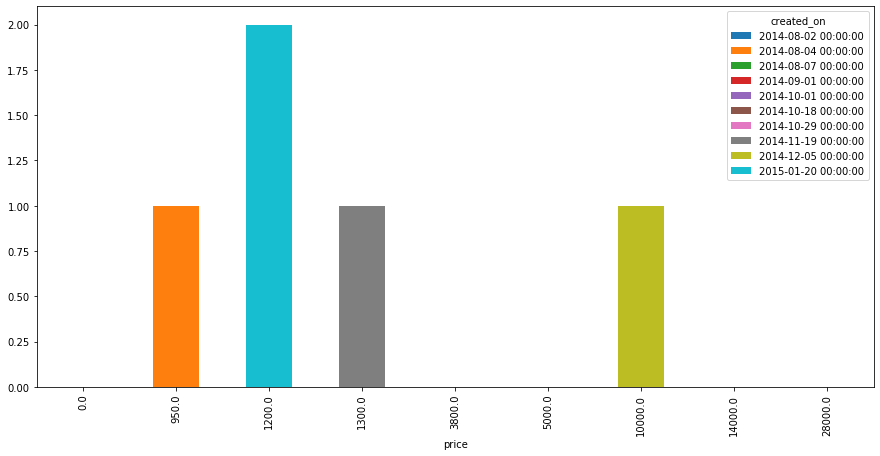

,price,created_on,rooms
0,0.0,2014-08-07,NaN
1,1200.0,2015-01-20,2.0
2,0.0,2014-10-29,NaN
3,950.0,2014-08-04,1.0
4,1300.0,2014-11-19,1.0
5,5000.0,2014-09-01,NaN
6,10000.0,2014-12-05,1.0
7,3800.0,2014-10-01,NaN
8,14000.0,2014-10-18,NaN
9,28000.0,2014-08-02,NaN


In [21]:
query = """

WITH state AS (
    SELECT price, created_on, rooms
    FROM `properati-data-public.properties_br.properties_rent_201502`  
)
SELECT *
FROM state

LIMIT 10
""".format(process_date_no_dash)

# Run a Standard SQL query using the environment's default project
df = pandas.read_gbq(query, dialect='standard')

# Run a Standard SQL query with the project set explicitly
df = pandas.read_gbq(query, project_id=project_id, dialect='standard')

print(query)

soome = df.pivot(index="price", columns="created_on", values="rooms")
soome.plot(kind="bar", stacked=True, figsize=(15, 7))

plt.show()

df.head(10)